In [1]:
%%capture

#%cd ..
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

sns.set()

pd.set_option('expand_frame_repr', True)
pd.set_option('display.column_space', 6)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.show_dimensions', True)

# Análise Exploratória

## Carregamento dos Dados

In [3]:
PROCESSED_DATA_FOLDER = Path('data/processed/')
data_df = pd.read_csv(PROCESSED_DATA_FOLDER/"fake_true_news_cleaned_normalized.csv", index_col=0) # TODO: checar como esta a estrutura no git!
#data_df = pd.read_csv(PROCESSED_DATA_FOLDER/"fake_true_news_cleaned (1).csv", index_col=0) # so pra comparacao antes de normalizar
data_df["class"] = data_df["class"].astype('category')

## Distribuições

In [5]:
CONTINUOUS_VARIABLES = [x for x, y in data_df.dtypes.iteritems() if str(y) not in ('category', 'object')]

## Teste de normalidade

This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.


[1]    D’Agostino, R. B. (1971), “An omnibus test of normality for moderate and large sample size”, Biometrika, 58, 341-348

[2]    D’Agostino, R. and Pearson, E. S. (1973), “Tests for departure from normality”, Biometrika, 60, 613-622


Testando: tokens


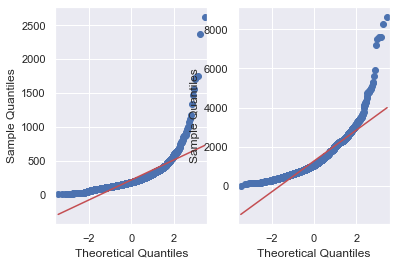

D'Agostino-Pearson
Fake: p = 0. Não parece normal (rejeita H0).
True: p = 0. Não parece normal (rejeita H0).

Mann-Whitney U test=249040.000, p=0.000
Fake é diferente de true (rejeita H0)




Testando: percent_words_no_punctuation


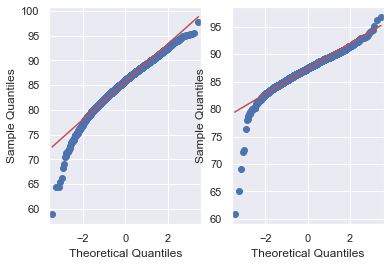

D'Agostino-Pearson
Fake: p = 5.67e-89. Não parece normal (rejeita H0).
True: p = 4.0354e-259. Não parece normal (rejeita H0).

Mann-Whitney U test=4608790.500, p=0.000
Fake é diferente de true (rejeita H0)




Testando: percent_adjectives


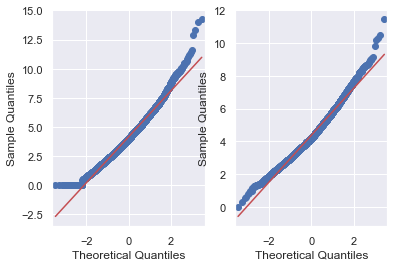

D'Agostino-Pearson
Fake: p = 1.04252e-47. Não parece normal (rejeita H0).
True: p = 3.96487e-36. Não parece normal (rejeita H0).

Mann-Whitney U test=5830389.000, p=0.000
Fake é diferente de true (rejeita H0)




Testando: percent_adverbs


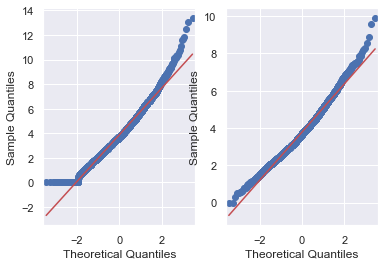

D'Agostino-Pearson
Fake: p = 2.55672e-44. Não parece normal (rejeita H0).
True: p = 1.99428e-31. Não parece normal (rejeita H0).

Mann-Whitney U test=6534037.000, p=0.822
Fake é igual a true (falhou em rejeitar H0)




Testando: percent_nouns


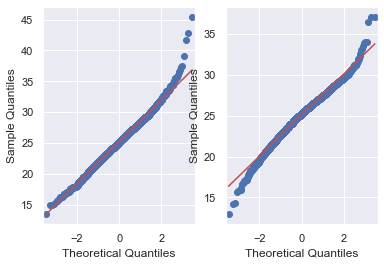

D'Agostino-Pearson
Fake: p = 2.98377e-16. Não parece normal (rejeita H0).
True: p = 3.12699e-25. Não parece normal (rejeita H0).

Mann-Whitney U test=6456429.500, p=0.516
Fake é igual a true (falhou em rejeitar H0)




Testando: percent_subjuntive_imperative_verbs


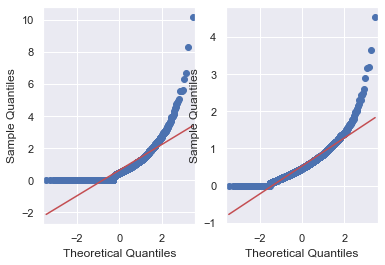

D'Agostino-Pearson
Fake: p = 0. Não parece normal (rejeita H0).
True: p = 0. Não parece normal (rejeita H0).

Mann-Whitney U test=6094944.500, p=0.000
Fake é diferente de true (rejeita H0)




Testando: types


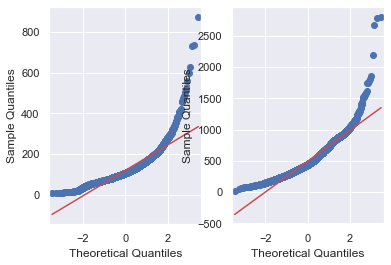

D'Agostino-Pearson
Fake: p = 0. Não parece normal (rejeita H0).
True: p = 2.05696e-304. Não parece normal (rejeita H0).

Mann-Whitney U test=298120.000, p=0.000
Fake é diferente de true (rejeita H0)




Testando: percent_links_inside


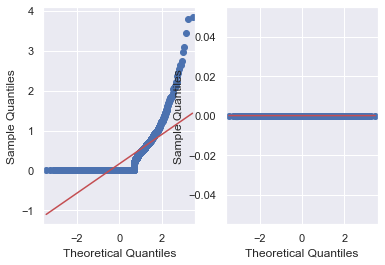

D'Agostino-Pearson
Fake: p = 0. Não parece normal (rejeita H0).
True: p = 0. Não parece normal (rejeita H0).

Mann-Whitney U test=8068042.500, p=1.000
Fake é igual a true (falhou em rejeitar H0)




Testando: percent_upper_words


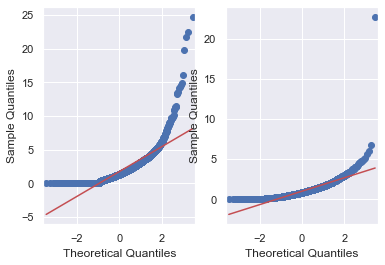

D'Agostino-Pearson
Fake: p = 0. Não parece normal (rejeita H0).
True: p = 0. Não parece normal (rejeita H0).

Mann-Whitney U test=8054308.500, p=1.000
Fake é igual a true (falhou em rejeitar H0)




Testando: percent_verbs


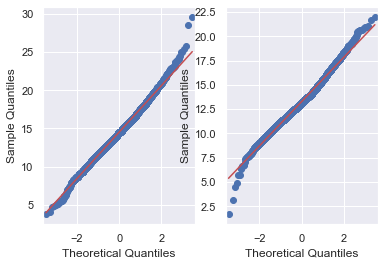

D'Agostino-Pearson
Fake: p = 1.53572e-11. Não parece normal (rejeita H0).
True: p = 1.23966e-16. Não parece normal (rejeita H0).

Mann-Whitney U test=8119776.500, p=1.000
Fake é igual a true (falhou em rejeitar H0)




Testando: percent_modal_verbs


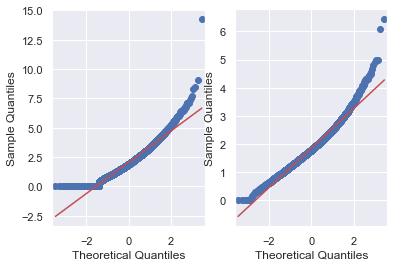

D'Agostino-Pearson
Fake: p = 1.66473e-142. Não parece normal (rejeita H0).
True: p = 4.53036e-87. Não parece normal (rejeita H0).

Mann-Whitney U test=6820501.500, p=1.000
Fake é igual a true (falhou em rejeitar H0)




Testando: percent_singular_first_second_personal_pronouns


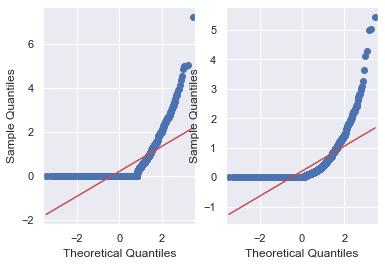

D'Agostino-Pearson
Fake: p = 0. Não parece normal (rejeita H0).
True: p = 0. Não parece normal (rejeita H0).

Mann-Whitney U test=5129072.500, p=0.000
Fake é diferente de true (rejeita H0)




Testando: percent_plural_first_personal_pronouns


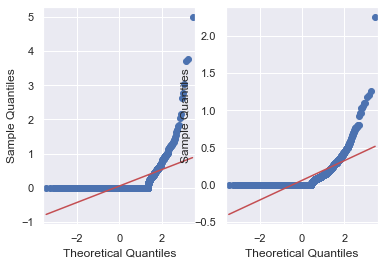

D'Agostino-Pearson
Fake: p = 0. Não parece normal (rejeita H0).
True: p = 0. Não parece normal (rejeita H0).

Mann-Whitney U test=5050796.500, p=0.000
Fake é diferente de true (rejeita H0)




Testando: percent_pronouns


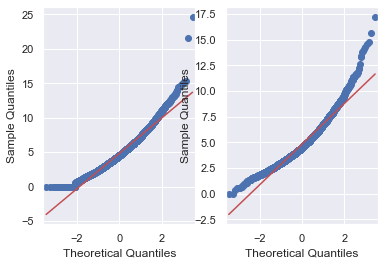

D'Agostino-Pearson
Fake: p = 2.11807e-112. Não parece normal (rejeita H0).
True: p = 8.90544e-133. Não parece normal (rejeita H0).

Mann-Whitney U test=6305901.500, p=0.047
Fake é diferente de true (rejeita H0)




Testando: pausality


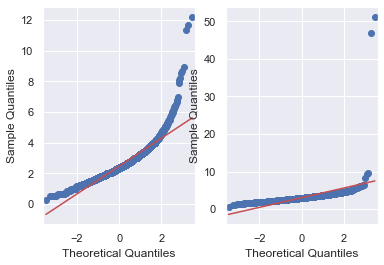

D'Agostino-Pearson
Fake: p = 0. Não parece normal (rejeita H0).
True: p = 0. Não parece normal (rejeita H0).

Mann-Whitney U test=3566719.500, p=0.000
Fake é diferente de true (rejeita H0)




Testando: characters


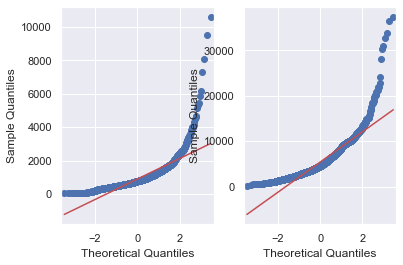

D'Agostino-Pearson
Fake: p = 0. Não parece normal (rejeita H0).
True: p = 0. Não parece normal (rejeita H0).

Mann-Whitney U test=238066.500, p=0.000
Fake é diferente de true (rejeita H0)




Testando: average_sentence_length


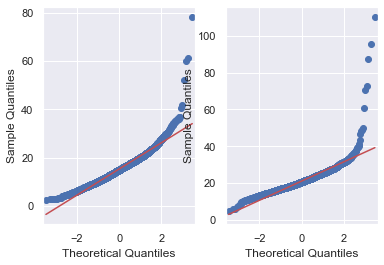

D'Agostino-Pearson
Fake: p = 7.89818e-273. Não parece normal (rejeita H0).
True: p = 0. Não parece normal (rejeita H0).

Mann-Whitney U test=2434690.500, p=0.000
Fake é diferente de true (rejeita H0)




Testando: average_word_lenght


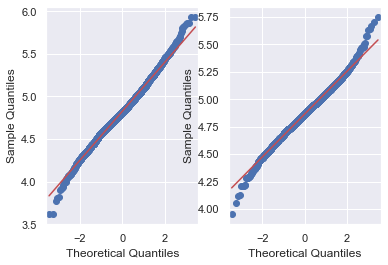

D'Agostino-Pearson
Fake: p = 3.94036e-10. Não parece normal (rejeita H0).
True: p = 1.15718e-12. Não parece normal (rejeita H0).

Mann-Whitney U test=5725019.500, p=0.000
Fake é diferente de true (rejeita H0)




Testando: percentage_spelling_errors


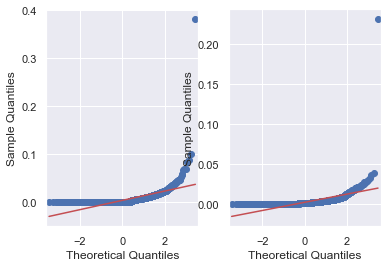

D'Agostino-Pearson
Fake: p = 0. Não parece normal (rejeita H0).
True: p = 0. Não parece normal (rejeita H0).

Mann-Whitney U test=5744716.000, p=0.000
Fake é diferente de true (rejeita H0)




Testando: emotiveness


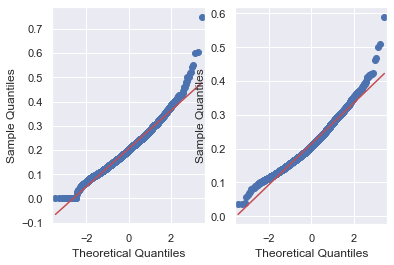

D'Agostino-Pearson
Fake: p = 1.92981e-58. Não parece normal (rejeita H0).
True: p = 1.4126e-56. Não parece normal (rejeita H0).

Mann-Whitney U test=5945642.500, p=0.000
Fake é diferente de true (rejeita H0)




Testando: diversity


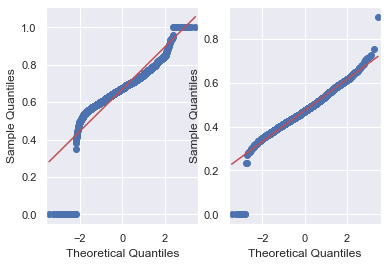

D'Agostino-Pearson
Fake: p = 0. Não parece normal (rejeita H0).
True: p = 4.41245e-109. Não parece normal (rejeita H0).

Mann-Whitney U test=12422053.500, p=1.000
Fake é igual a true (falhou em rejeitar H0)




Variables: ['tokens', 'percent_words_no_punctuation', 'percent_adjectives', 'percent_adverbs', 'percent_nouns', 'percent_subjuntive_imperative_verbs', 'types', 'percent_links_inside', 'percent_upper_words', 'percent_verbs', 'percent_modal_verbs', 'percent_singular_first_second_personal_pronouns', 'percent_plural_first_personal_pronouns', 'percent_pronouns', 'pausality', 'characters', 'average_sentence_length', 'average_word_lenght', 'percentage_spelling_errors', 'emotiveness', 'diversity']
P_value: [0.0, 5.22287592124296e-98, 7.094435632606303e-13, 0.8216842068602359, 0.5155612850198287, 2.099542110533467e-05, 0.0, 1.0, 1.0, 1.0, 0.9999854550488534, 6.29136092294436e-73, 9.497506565695714e-113, 0.047140022577364014, 1.0161438192339316e-236, 0.0, 0.0, 6.119127270543184e-17, 4.697

In [7]:
#separando os dados entre os true e fake news
p_values_list = ([],[],[]) # usado so pra imprimir ao final os dados (masi facil de copiar e colar em algum outro local)
#verificando a normalidade dos dados por grupo
for col in CONTINUOUS_VARIABLES:
    data_fake = data_df[data_df['class'] == 'Fake']
    data_true = data_df[data_df['class'] == 'True']
    print('Testando: ' + col)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

    qqplot(data_fake[col].values, line='s', ax=ax1)
    qqplot(data_true[col].values, line='s', ax=ax2)
    plt.savefig('images/'+col+'.png')
    plt.show()

    k2, p_fake = stats.normaltest(data_fake[col].values)
    k2, p_true = stats.normaltest(data_true[col].values)
    alpha = 0.05
    
    print("D'Agostino-Pearson")
    if p_fake < alpha: # Não é uma distribuição normal!
        print("Fake: p = {:g}. Não parece normal (rejeita H0).".format(p_fake))
    else:
        print("Fake: p = {:g}. Parece normal (falha em rejeitar H0).".format(p_fake))
    
    if p_true < alpha: # Não é uma distribuição normal!
        print("True: p = {:g}. Não parece normal (rejeita H0).".format(p_true))
    else:
        print("True: p = {:g}. Parece normal (falha em rejeitar H0).".format(p_true))
    
    # k2, p_fake = stats.shapiro(data_fake[col].values)
    # k2, p_true = stats.shapiro(data_true[col].values)
    # alpha = 0.05
    # print("Shapiro-Wilk")
    # if p_fake < alpha: # Não é uma distribuição normal!
    #     print("Fake: p = {:g}. Não parece normal (rejeita H0).".format(p_fake))
    # else:
    #     print("Fake: p = {:g}. Parece normal (falha em rejeitar H0).".format(p_fake))
    
    # if p_true < alpha: # Não é uma distribuição normal!
    #     print("True: p = {:g}. Não parece normal (rejeita H0).".format(p_true))
    # else:
    #     print("True: p = {:g}. Parece normal (falha em rejeitar H0).".format(p_true))
        
    # k2, p_fake = stats.kstest(data_fake[col].values, 'norm')
    # k2, p_true = stats.kstest(data_true[col].values, 'norm')
    # alpha = 0.05
    # print("Kolmogorov-Smirnov")
    # if p_fake < alpha: # Não é uma distribuição normal!
    #     print("Fake: p = {:g}. Não parece normal (rejeita H0).".format(p_fake))
    # else:
    #     print("Fake: p = {:g}. Parece normal (falha em rejeitar H0).".format(p_fake))
    
    # if p_true < alpha: # Não é uma distribuição normal!
    #     print("True: p = {:g}. Não parece normal (rejeita H0).".format(p_true))
    # else:
    #     print("True: p = {:g}. Parece normal (falha em rejeitar H0).".format(p_true))
    print()
        
    # uesar Mann-Whitney U test
    stat, p = stats.mannwhitneyu(data_fake[col].values, data_true[col].values, alternative='less')
    print('Mann-Whitney U test=%.3f, p=%.3f' % (stat, p))
    alpha_utest = 0.05
    if p > alpha_utest:
        print('Fake é igual a true (falhou em rejeitar H0)')
    else:
        print('Fake é diferente de true (rejeita H0)')
    
    print('\n\n\n')
    
    # usado so pra imprimir ao final os dados (masi facil de copiar e colar em algum outro local)
    # p_values_list[0].append(p)
    # p_values_list[1].append(str(p > alpha_utest))
    # p_values_list[2].append(col)
    
# prints just to make it easier to copy/paste the data in a table elsewhere
#print("Variables: "+ str(p_values_list[2]))
#print("P_value: "+ str(p_values_list[0]))
#print("p > alpha_utest: "+ str(p_values_list[1]))